<a href="https://colab.research.google.com/github/ParvazeMahmudBitto/CSE475_Machine-Learning/blob/main/lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(url, header=None, names=columns)

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

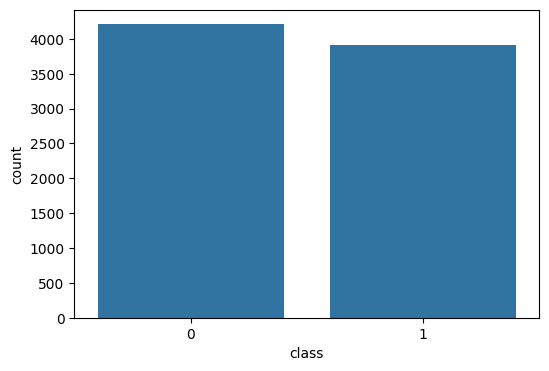

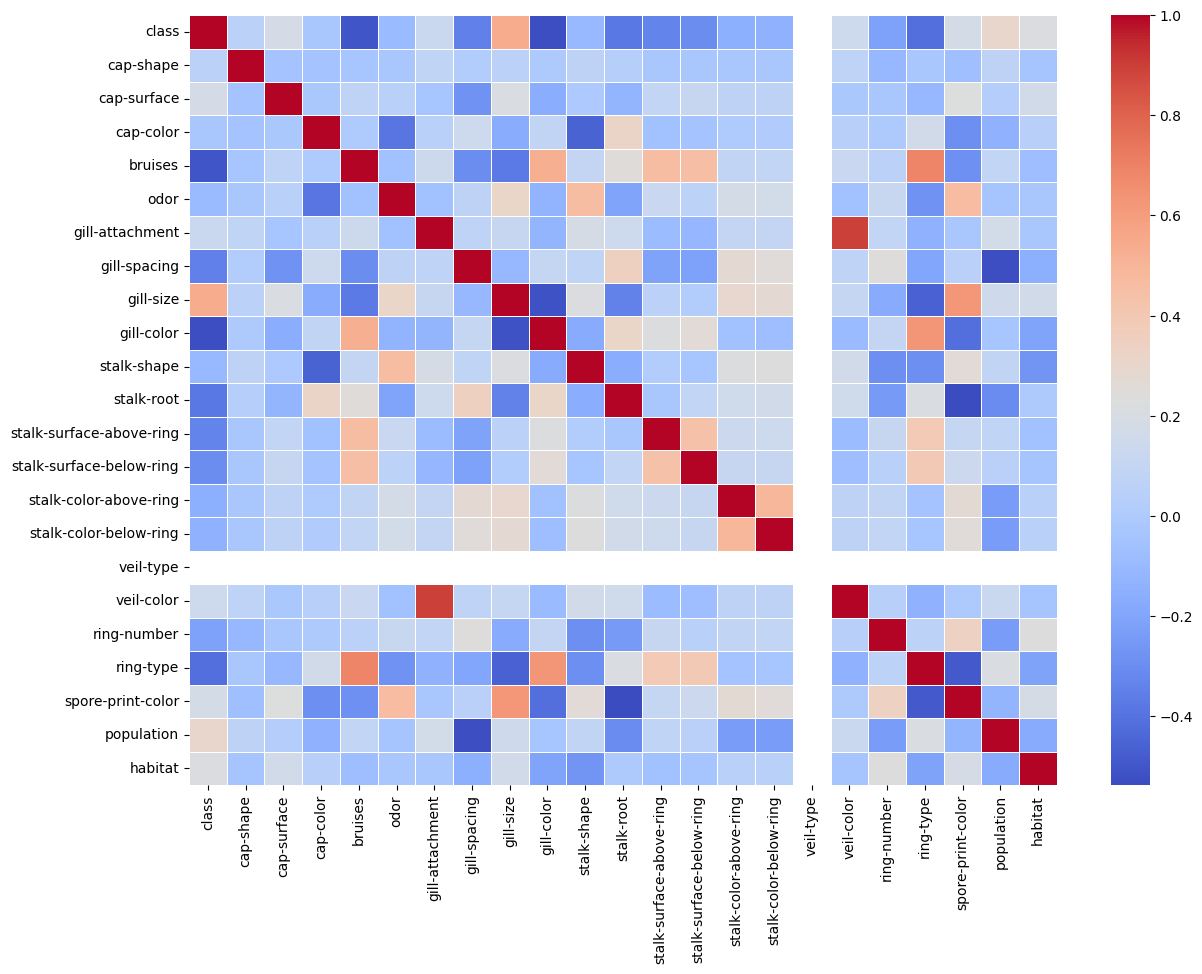

In [3]:
df.info()
print(df['class'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

In [4]:
import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class ManualDecisionTree:
    def __init__(self, min_samples_split=2, max_depth=15):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        dataset = np.c_[X, y]
        self.root = self._build_tree(dataset, 0)

    def _build_tree(self, dataset, curr_depth):
        X, y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = X.shape

        if num_samples >= self.min_samples_split and curr_depth < self.max_depth:
            best_split = self._get_best_split(dataset, num_samples, num_features)
            if best_split is not None and best_split["info_gain"] > 0:
                left_subtree = self._build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self._build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(
                    feature_index=best_split["feature_index"],
                    threshold=best_split["threshold"],
                    left=left_subtree,
                    right=right_subtree
                )

        leaf_value = self._calculate_leaf_value(y)
        return Node(value=leaf_value)

    def _get_best_split(self, dataset, num_samples, num_features):
        best_split = None
        max_info_gain = -float("inf")
        y = dataset[:, -1]

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold

                if np.any(left_mask) and np.any(right_mask):
                    left_y = y[left_mask]
                    right_y = y[right_mask]

                    curr_info_gain = self._information_gain(y, left_y, right_y)

                    if curr_info_gain > max_info_gain:
                        dataset_left = dataset[left_mask]
                        dataset_right = dataset[right_mask]
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "dataset_left": dataset_left,
                            "dataset_right": dataset_right,
                            "info_gain": curr_info_gain
                        }
                        max_info_gain = curr_info_gain

        return best_split

    def _information_gain(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        return self._entropy(parent) - (
            weight_l * self._entropy(l_child) + weight_r * self._entropy(r_child)
        )

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log2(probabilities))

    def _calculate_leaf_value(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def predict(self, X):
        return np.array([self._make_prediction(x, self.root) for x in X])

    def _make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        if x[tree.feature_index] <= tree.threshold:
            return self._make_prediction(x, tree.left)
        else:
            return self._make_prediction(x, tree.right)

In [5]:
manual_dt = ManualDecisionTree(max_depth=5)
manual_dt.fit(X_train, y_train)
y_pred_manual = manual_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_manual)
print(dt_accuracy)

0.9811320754716981


In [6]:
n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rf_accuracies.append(acc)
    print(f"n_estimators = {n} -> accuracy = {acc}")

n_estimators = 1 -> accuracy = 1.0
n_estimators = 50 -> accuracy = 1.0
n_estimators = 100 -> accuracy = 1.0
n_estimators = 150 -> accuracy = 1.0
n_estimators = 200 -> accuracy = 1.0
n_estimators = 250 -> accuracy = 1.0


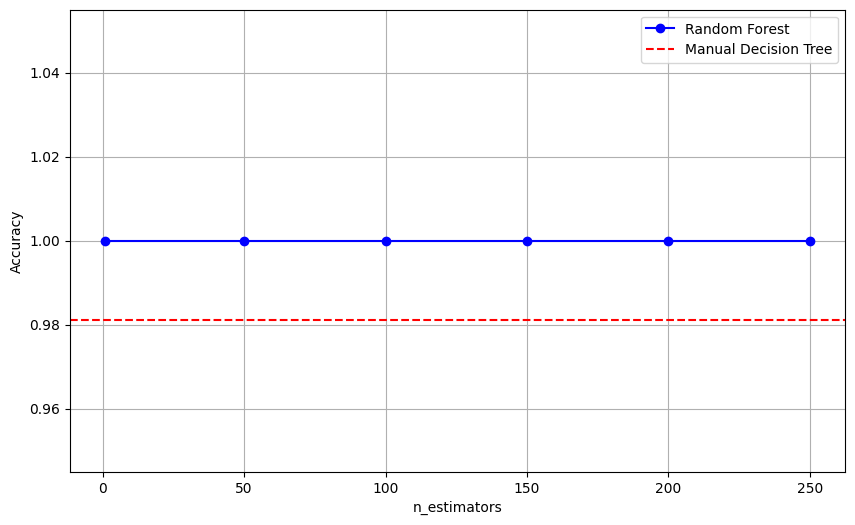

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, rf_accuracies, marker='o', label='Random Forest', color='blue')
plt.axhline(y=dt_accuracy, color='red', linestyle='--', label='Manual Decision Tree')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
best_rf_acc = max(rf_accuracies)
print(f"Manual Decision Tree Accuracy: {dt_accuracy}")
print(f"Best Random Forest Accuracy: {best_rf_acc}")

if best_rf_acc > dt_accuracy:
    print("Random Forest performed better")
elif dt_accuracy > best_rf_acc:
    print("Decision Tree performed better")
else:
    print("Both models performed equally")

Manual Decision Tree Accuracy: 0.9811320754716981
Best Random Forest Accuracy: 1.0
Random Forest performed better


Decision Tree Detailed Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1257
           1       0.97      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Random Forest (n=250) Detailed Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



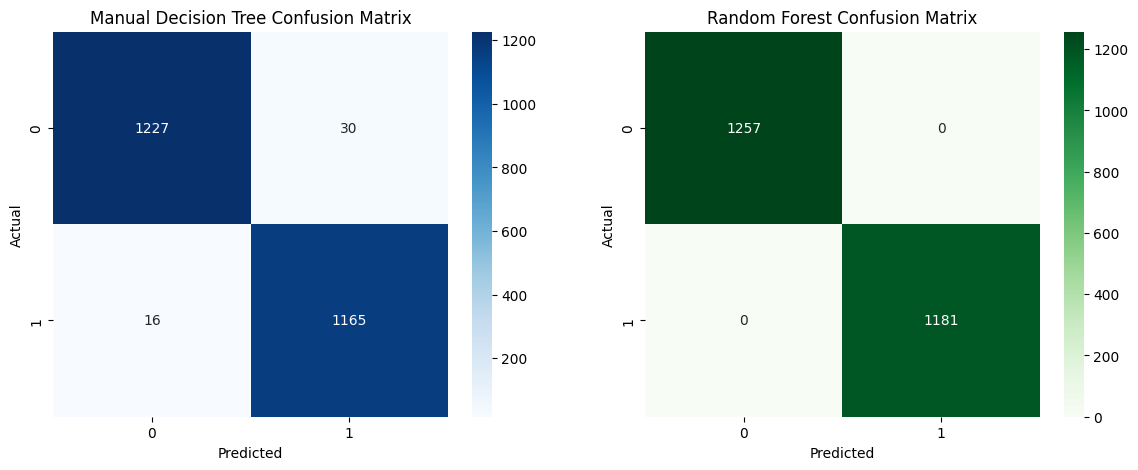

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

dt = ManualDecisionTree(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Detailed Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest (n=250) Detailed Report:")
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Manual Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()